In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize

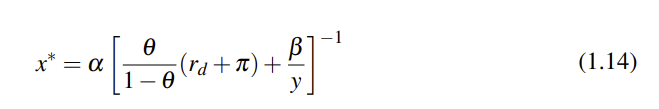

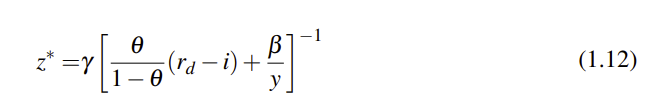

In [3]:
def best_response_household_x_z_given_y(y,r_d,pi,i,alpha,beta,gamma,theta):
    x = alpha * ( (theta/(1-theta))*(r_d+pi)+beta/y )**(-1)
    z = gamma * ( (theta/(1-theta))*(r_d-i)+beta/y )**(-1)
    
    # return {'x':x, 'y':y, 'z':z, 'sum': x+y+z}
    return {'x':x, 'y':y, 'z':z}


In [4]:
def best_response_function_to_solve_for_zero(y,r_d,pi,i,alpha,beta,gamma,theta):
    
    # print(f"y {y}")
    # print(f"r_d {r_d}")
    # print(f"pi {pi}")
    # print(f"i {i}")
    # print(f"alpha {alpha}")
    # print(f"theta {theta}")

    x = alpha * ( (theta/(1-theta))*(r_d+pi)+beta/y )**(-1)
    z = gamma * ( (theta/(1-theta))*(r_d-i)+beta/y )**(-1)
    
    # print ({'y':y,'f(y)':x+y+z-1})
    return x+y+z-1
    

In [5]:
optimize.brentq(best_response_function_to_solve_for_zero, 1e-5, 0.99999, args=(15,-1,10,1/3,1/3,1/3,.95))

0.9952519978435217

In [6]:
def best_response_household(r_d,pi,i,alpha,beta,gamma,theta):
    # print("best response household")
    y_star = optimize.root(best_response_function_to_solve_for_zero, x0=0.5,args=(r_d,pi,i,alpha,beta,gamma,theta)).x[0]
    
    return best_response_household_x_z_given_y(y_star,r_d,pi,i,alpha,beta,gamma,theta)

In [7]:
# rd_grid = np.linspace(-.1,.10,100)
rd_grid = np.linspace(-.2,.10,100)

Text(0, 0.5, 'Allocation')

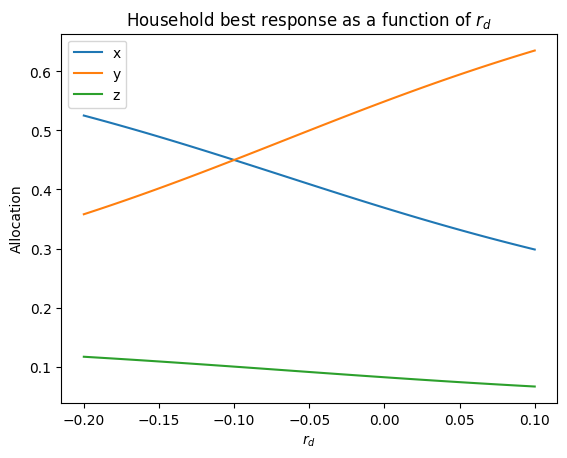

In [8]:
pd.DataFrame([best_response_household(x,.10,-.10,45/100,45/100,10/100,.8) for x in rd_grid]).set_index(rd_grid).plot()
plt.title("Household best response as a function of ${r_d}$")
plt.xlabel("${r_d}$")
plt.ylabel("Allocation")
# plt.savefig('household_best_response_80pct_theta.pdf')


Text(0, 0.5, 'Allocation')

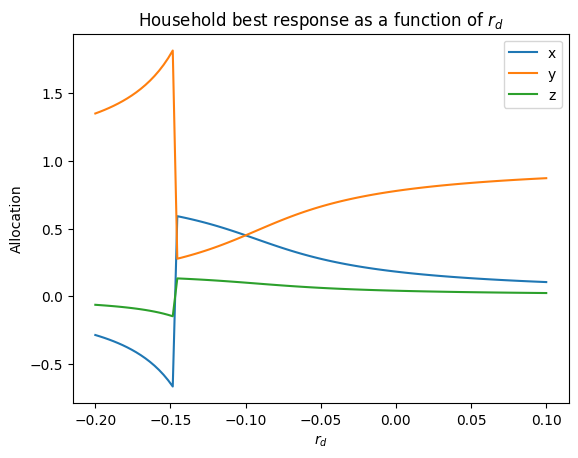

In [9]:
pd.DataFrame([best_response_household(x,.1,-.1,45/100,45/100,10/100,.95) for x in rd_grid]).set_index(rd_grid).plot()
plt.title("Household best response as a function of ${r_d}$")
plt.xlabel("${r_d}$")
plt.ylabel("Allocation")
# plt.savefig('household_best_response_95pct_theta.pdf')


Text(0, 0.5, 'Allocation')

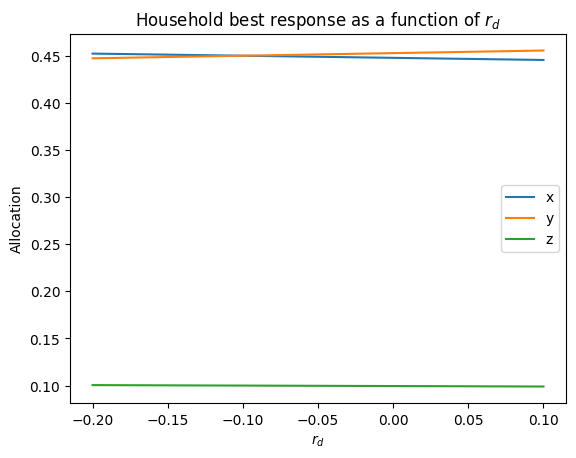

In [10]:
pd.DataFrame([best_response_household(x,.1,-.1,45/100,45/100,10/100,.1) for x in rd_grid]).set_index(rd_grid).plot()
plt.title("Household best response as a function of ${r_d}$")
plt.xlabel("${r_d}$")
plt.ylabel("Allocation")
# plt.savefig('household_best_response_10pct_theta.pdf')


In [11]:
y_grid = np.linspace(0.01,.99,100)

In [12]:
def derivative_wrt_rd_household(r_d,pi,i,alpha,beta,gamma,theta, h_step=.0001):
    f_plus = pd.Series(best_response_household(r_d+h_step,pi,i,alpha,beta,gamma,theta))
    f_minus = pd.Series(best_response_household(r_d-h_step,pi,i,alpha,beta,gamma,theta))
    
    # print(f_plus)
    # print(f_minus)
    return (f_plus - f_minus)/(2*h_step)
    

In [13]:
h_step_grid = np.linspace(0.0001,0.5,100)

In [14]:
all_derivatives = np.zeros(len(h_step_grid))

In [15]:
for i, h_i in enumerate(h_step_grid):
    
    all_derivatives[i] = derivative_wrt_rd_household(r_d=0,pi=0,i=.5,alpha=1/3,beta=1/3,gamma=1/3,theta=.9).loc['y']

In [16]:
derivative_wrt_rd_household(r_d=0,pi=0,i=.005,alpha=1/3,beta=1/3,gamma=1/3,theta=.9).loc['y']

np.float64(1.969311692991138)

In [17]:
rd_grid = np.linspace(-.10,0.2,100)

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
/var/folders/43/3m6t_3v11kxb00q56pcpvgk00000gp/T/ipykernel_762/1627188575.py:2: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Household best response $\partial z/\partial r_d$ as a function of ${r_d}$")
/var/folders/43/3m6t_3v11kxb00q56pcpvgk00000gp/T/ipykernel_762/1627188575.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\partial z/\partial r_d$")


Text(0, 0.5, '$\\partial z/\\partial r_d$')

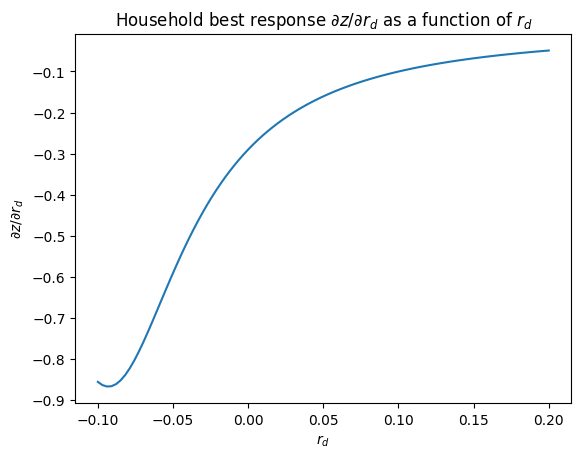

In [18]:
pd.DataFrame([derivative_wrt_rd_household(r_d=x,pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95).loc['z'] for x in rd_grid]).set_index(rd_grid).plot(legend=False)
plt.title("Household best response $\partial z/\partial r_d$ as a function of ${r_d}$")
plt.xlabel("${r_d}$")
plt.ylabel("$\partial z/\partial r_d$")
# plt.savefig('household_best_response_derivative_z_wrt_rd_95pct_theta.pdf')


<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
/var/folders/43/3m6t_3v11kxb00q56pcpvgk00000gp/T/ipykernel_762/3570197687.py:2: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Household best response $\partial y/\partial r_d$ as a function of ${r_d}$")
/var/folders/43/3m6t_3v11kxb00q56pcpvgk00000gp/T/ipykernel_762/3570197687.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\partial y/\partial r_d$")


Text(0, 0.5, '$\\partial y/\\partial r_d$')

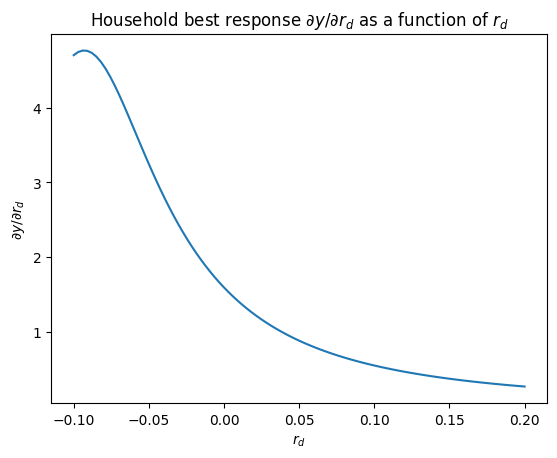

In [19]:
pd.DataFrame([derivative_wrt_rd_household(r_d=x,pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95).loc['y'] for x in rd_grid]).set_index(rd_grid).plot(legend=False)
plt.title("Household best response $\partial y/\partial r_d$ as a function of ${r_d}$")
plt.xlabel("${r_d}$")
plt.ylabel("$\partial y/\partial r_d$")
# plt.savefig('household_best_response_derivative_y_wrt_rd_95pct_theta.pdf')


In [20]:
def commercial_bank_function_to_solve_for_zero(r_d,pi,i,alpha,beta,gamma,theta,r_L):
    
    # y_star = optimize.root_scalar(best_response_function_to_solve_for_zero,bracket=(0.001,0.999), args=(r_d,pi,i,alpha,beta,gamma,theta), method='brentq').root
    # y_star = optimize.root_scalar(best_response_function_to_solve_for_zero,x0=0.5, x1=0.8, args=(r_d,pi,i,alpha,beta,gamma,theta)).root
    
    y_star = optimize.root(best_response_function_to_solve_for_zero, x0=0.5,args=(r_d,pi,i,alpha,beta,gamma,theta)).x[0]
    
    partial_y = derivative_wrt_rd_household(r_d,pi,i,alpha,beta,gamma,theta).loc['y']
    
    if abs(partial_y) < 1e-4: partial_y=0
    
    # print(f"y_star {y_star}")
    # print(f"partial_y {partial_y}")
    output = partial_y*(r_L-r_d) - y_star
    
    
    return np.round(output,3)

In [21]:
commercial_bank_function_to_solve_for_zero(0.05,.1,.0,45/100,45/100,10/100,.95,.1)

np.float64(-0.728)

In [22]:
def optimal_response_commercial_bank(pi,i,alpha,beta,gamma,theta,r_L):
    # a = np.maximum(abs(pi),abs(i))
    # r_d_star = optimize.brentq(commercial_bank_function_to_solve_for_zero, -pi, 2*pi, args=(pi,i,alpha,beta,gamma,theta,r_L))
    r_d_star = optimize.bisect(commercial_bank_function_to_solve_for_zero, -pi, r_L, args=(pi,i,alpha,beta,gamma,theta,r_L))

    # r_d_star = optimize.root_scalar(commercial_bank_function_to_solve_for_zero,x0=-a,x1=a/10,args=(pi,i,alpha,beta,gamma,theta,r_L), method='secant').root
    
    
    return np.maximum(np.minimum(r_d_star,r_L),-pi)

In [45]:
i_grid = np.linspace(-.10,.10,50)

In [25]:
optimal_response_commercial_bank(pi=.01,i=.001,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=1)

np.float64(0.13443542480468754)

In [26]:
all_responses = np.random.random(1000)
all_responses_commercial_bank = np.zeros(len(all_responses))

In [27]:
for i in range(len(all_responses)):
    all_responses_commercial_bank[i] = optimal_response_commercial_bank(pi=.1,i= all_responses[i],alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=.2)

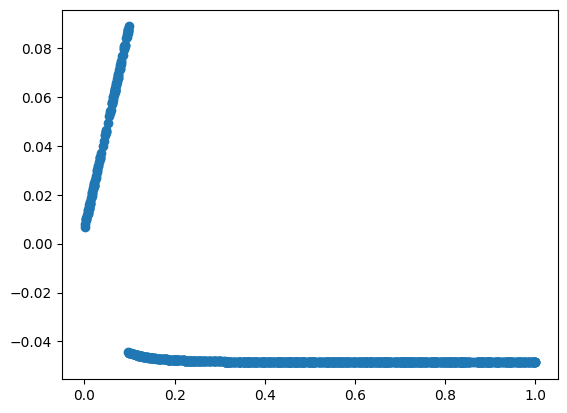

In [28]:
plt.scatter(all_responses,all_responses_commercial_bank)

In [29]:
# commercial_bank_best_responses_to_i = []
# for i in i_grid:
#     try:
#         commercial_bank_best_responses_to_i.append((i,optimal_response_commercial_bank(pi=.1,i=i,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L)))
#     except:
#         print(f"error during {i}")
#         continue
        


In [46]:
r_L=.1
commercial_bank_best_responses_to_i = []
for i in i_grid:
    try:
        commercial_bank_best_responses_to_i.append((i,optimal_response_commercial_bank(pi=.1,i=i,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L)))
    except:
        print(f"error during {i}")
        continue
        

commercial_bank_best_responses_to_i_DF = pd.DataFrame(commercial_bank_best_responses_to_i)
commercial_bank_best_responses_to_i_DF.columns = ['i','best_response_r_d']
commercial_bank_best_responses_to_i_DF = commercial_bank_best_responses_to_i_DF.set_index('i')

In [47]:
optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L)

np.float64(-0.062109375000000015)

Text(0.5, 0, '$r_{CBDC}$')

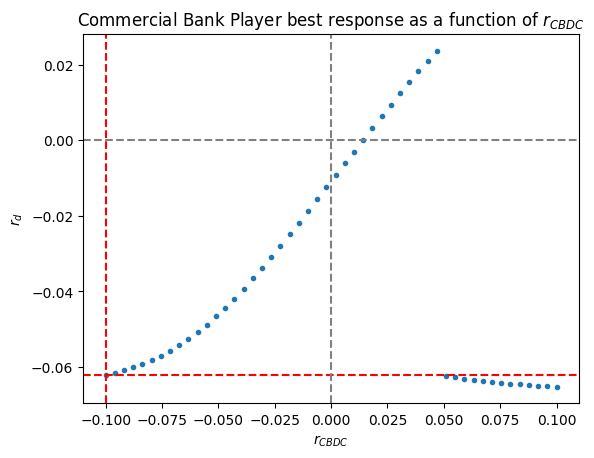

In [48]:
commercial_bank_best_responses_to_i_DF.plot(legend=False,marker=".", linestyle='')
# commercial_bank_best_responses_to_i_DF.plot(legend=False)
plt.axhline(optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L), color = 'r', linestyle='--')
plt.axvline(-.1, color = 'r', linestyle='--')
plt.axvline(0, color = 'grey', linestyle='--')
plt.axhline(0, color = 'grey', linestyle='--')

plt.title("Commercial Bank Player best response as a function of ${r_{CBDC}}$")
plt.ylabel("${r_d}$")
plt.xlabel("$r_{CBDC}$")
# plt.savefig('Commercial_bank_best_response_as_function_of_r_CBDC_rL_01.pdf')

0.0014404296874999908


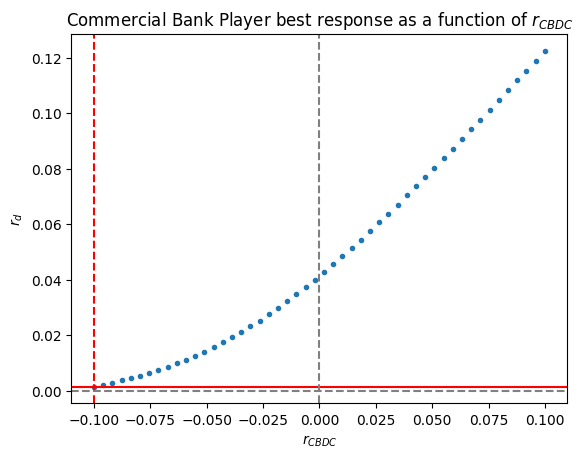

In [49]:
r_L=.5
commercial_bank_best_responses_to_i = []
for i in i_grid:
    try:
        commercial_bank_best_responses_to_i.append((i,optimal_response_commercial_bank(pi=.1,i=i,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L)))
    except:
        print(f"error during {i}")
        continue
        

commercial_bank_best_responses_to_i_DF = pd.DataFrame(commercial_bank_best_responses_to_i)
commercial_bank_best_responses_to_i_DF.columns = ['i','best_response_r_d']
commercial_bank_best_responses_to_i_DF = commercial_bank_best_responses_to_i_DF.set_index('i')
# commercial_bank_best_responses_to_i_DF.plot(legend=False,marker="*", linestyle='')
commercial_bank_best_responses_to_i_DF.plot(legend=False,marker=".", linestyle='')
plt.axhline(optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L), color = 'r', linestyle='-')
plt.axvline(-.1, color = 'r', linestyle='--')
plt.axvline(0, color = 'grey', linestyle='--')
plt.axhline(0, color = 'grey', linestyle='--')

plt.title("Commercial Bank Player best response as a function of ${r_{CBDC}}$")
plt.ylabel("${r_d}$")
plt.xlabel("$r_{CBDC}$")
print(optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L))
# plt.savefig('Commercial_bank_best_response_as_function_of_r_CBDC_rL_05.pdf')

-0.0763427734375


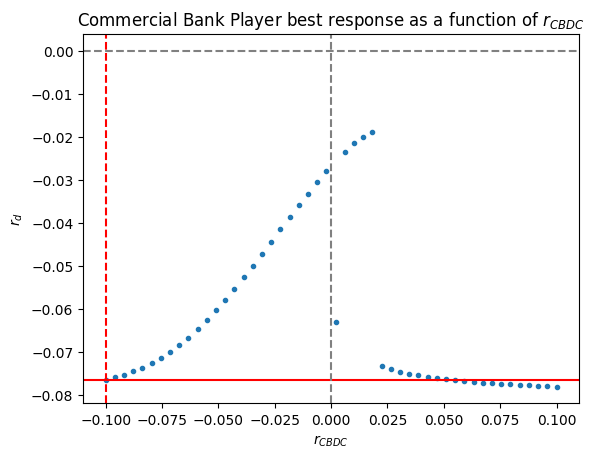

In [50]:
r_L=.05
commercial_bank_best_responses_to_i = []
for i in i_grid:
    try:
        commercial_bank_best_responses_to_i.append((i,optimal_response_commercial_bank(pi=.1,i=i,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L)))
    except:
        print(f"error during {i}")
        continue
        

commercial_bank_best_responses_to_i_DF = pd.DataFrame(commercial_bank_best_responses_to_i)
commercial_bank_best_responses_to_i_DF.columns = ['i','best_response_r_d']
commercial_bank_best_responses_to_i_DF = commercial_bank_best_responses_to_i_DF.set_index('i')
# commercial_bank_best_responses_to_i_DF.plot(legend=False,marker="*", linestyle='')
commercial_bank_best_responses_to_i_DF.plot(legend=False,marker=".", linestyle='')
plt.axhline(optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L), color = 'r', linestyle='-')
plt.axvline(-.1, color = 'r', linestyle='--')
plt.axvline(0, color = 'grey', linestyle='--')
plt.axhline(0, color = 'grey', linestyle='--')

plt.title("Commercial Bank Player best response as a function of ${r_{CBDC}}$")
plt.ylabel("${r_d}$")
plt.xlabel("$r_{CBDC}$")
print(optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L))
# plt.savefig('Commercial_bank_best_response_as_function_of_r_CBDC_rL_005.pdf')

0.050189208984375004


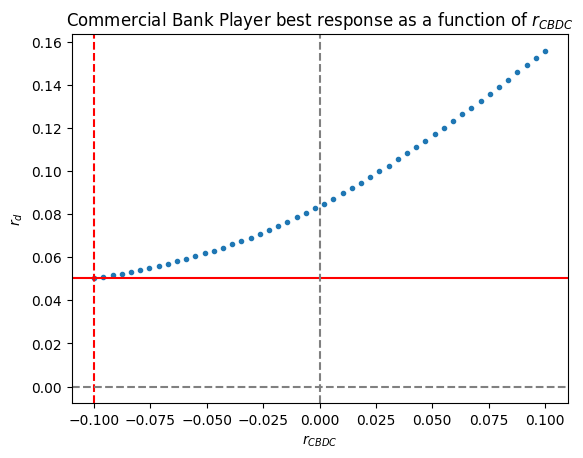

In [51]:
r_L=1
commercial_bank_best_responses_to_i = []
for i in i_grid:
    try:
        commercial_bank_best_responses_to_i.append((i,optimal_response_commercial_bank(pi=.1,i=i,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L)))
    except:
        print(f"error during {i}")
        continue
        

commercial_bank_best_responses_to_i_DF = pd.DataFrame(commercial_bank_best_responses_to_i)
commercial_bank_best_responses_to_i_DF.columns = ['i','best_response_r_d']
commercial_bank_best_responses_to_i_DF = commercial_bank_best_responses_to_i_DF.set_index('i')
commercial_bank_best_responses_to_i_DF.plot(legend=False,marker=".", linestyle='')
# commercial_bank_best_responses_to_i_DF.plot(legend=False)
plt.axhline(optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L), color = 'r', linestyle='-')
plt.axvline(-.1, color = 'r', linestyle='--')
plt.axvline(0, color = 'grey', linestyle='--')
plt.axhline(0, color = 'grey', linestyle='--')

plt.title("Commercial Bank Player best response as a function of ${r_{CBDC}}$")
plt.ylabel("${r_d}$")
plt.xlabel("$r_{CBDC}$")
print(optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L))
# plt.savefig('Commercial_bank_best_response_as_function_of_r_CBDC_rL_1.pdf')

# Plot of r_d as a function of r_L

In [52]:
r_L_grid = np.linspace(0,1,100)

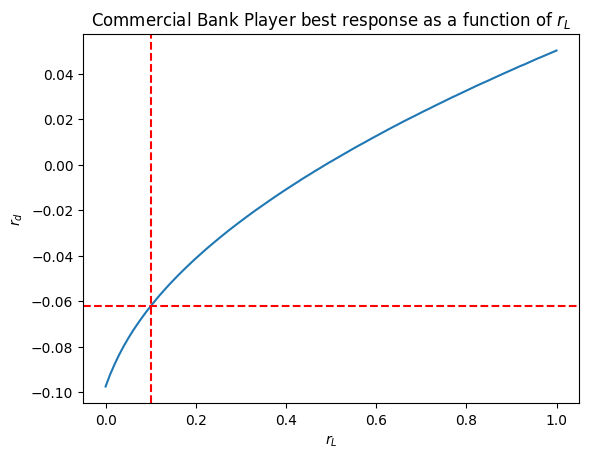

In [53]:
pd.DataFrame([optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=x) for x in r_L_grid]).set_index(r_L_grid).plot(legend=False)
plt.title("Commercial Bank Player best response as a function of ${r_L}$")
plt.ylabel("${r_d}$")
plt.xlabel("$r_L$")
plt.axhline(optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=.1), color = 'r', linestyle='--')
plt.axvline(.1, color = 'r', linestyle='--')
# plt.savefig('Commercial_bank_best_response_as_function_of_rL.pdf')

In [54]:
def utility_commercial_bank(r_d,pi,i,alpha,beta,gamma,theta,r_L,sign=-1):
    # return (r_L-r_d)*optimize.brentq(best_response_function_to_solve_for_zero, 1e-5, 0.99999, args=(r_d,pi,i,alpha,beta,gamma,theta))
    y_star = optimize.root(best_response_function_to_solve_for_zero, x0=0.5,args=(r_d,pi,i,alpha,beta,gamma,theta)).x[0]

    return sign*(r_L-r_d)*y_star


In [46]:
# def best_response_commercial_bank(pi,i,alpha,beta,gamma,theta,r_L):
#     # return minimize(utility_commercial_bank, 0.0, args=(pi,i,alpha,beta,gamma,theta,r_L), method='Nelder-Mead', tol=1e-6).x.item()
#     return minimize(utility_commercial_bank, 2*pi, args=(pi,i,alpha,beta,gamma,theta,r_L), method='Nelder-Mead', tol=1e-8).x.item()

In [47]:
# best_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=1)

In [48]:
# max(x[1] for x in commercial_bank_best_responses_to_i)

In [49]:
# max(x[0] for x in commercial_bank_best_responses_to_i)

# NC: test, I get the same with best_response and optimal_response functions

In [50]:
# r_L=1
# commercial_bank_best_responses_to_i = []
# for i in i_grid:
#     try:
#         # print(f"getting response for CBDC rate {i}")
#         response = best_response_commercial_bank(pi=.1,i=i,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L)
#         # response = optimal_response_commercial_bank(pi=.1,i=i,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L)

#         if abs(response)>0.5: print(f"response is {response}")
#         commercial_bank_best_responses_to_i.append((i,response))
#     except:
#         print(f"error during {i}")
#         continue

# commercial_bank_best_responses_to_i_DF = pd.DataFrame(commercial_bank_best_responses_to_i)
# commercial_bank_best_responses_to_i_DF.columns = ['i','best_response_r_d']
# commercial_bank_best_responses_to_i_DF = commercial_bank_best_responses_to_i_DF.set_index('i')
# # commercial_bank_best_responses_to_i_DF.plot(legend=False,marker="*", linestyle='')
# commercial_bank_best_responses_to_i_DF.plot(legend=False)
# plt.axhline(optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L), color = 'r', linestyle='-')
# plt.axvline(-.1, color = 'r', linestyle='--')
# plt.axvline(0, color = 'grey', linestyle='--')
# plt.axhline(0, color = 'grey', linestyle='--')

# plt.title("Commercial Bank Player best response as a function of ${i}$")
# plt.ylabel("${r_d}$")
# plt.xlabel("$i$")
# # print(optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L))
# # plt.savefig('Commercial_bank_best_response_as_function_of_i_rL_50.pdf')

# NC: talk about the stability of the solution using the root

In [51]:
# del best_response_commercial_bank

Text(0.5, 0, '$i$')

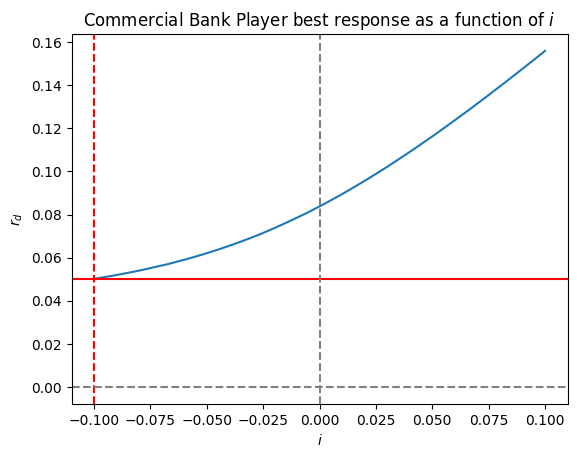

In [55]:
r_L=1
commercial_bank_best_responses_to_i = []
for i in i_grid:
    try:
        # print(f"getting response for CBDC rate {i}")
        # response = best_response_commercial_bank(pi=.1,i=i,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L)
        response = optimal_response_commercial_bank(pi=.1,i=i,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L)

        if abs(response)>0.5: print(f"response is {response}")
        commercial_bank_best_responses_to_i.append((i,response))
    except:
        print(f"error during {i}")
        continue

commercial_bank_best_responses_to_i_DF = pd.DataFrame(commercial_bank_best_responses_to_i)
commercial_bank_best_responses_to_i_DF.columns = ['i','best_response_r_d']
commercial_bank_best_responses_to_i_DF = commercial_bank_best_responses_to_i_DF.set_index('i')
# commercial_bank_best_responses_to_i_DF.plot(legend=False,marker="*", linestyle='')
commercial_bank_best_responses_to_i_DF.plot(legend=False)
plt.axhline(optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L), color = 'r', linestyle='-')
plt.axvline(-.1, color = 'r', linestyle='--')
plt.axvline(0, color = 'grey', linestyle='--')
plt.axhline(0, color = 'grey', linestyle='--')

plt.title("Commercial Bank Player best response as a function of ${i}$")
plt.ylabel("${r_d}$")
plt.xlabel("$i$")
# print(optimal_response_commercial_bank(pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=r_L))
# plt.savefig('Commercial_bank_best_response_as_function_of_i_rL_50.pdf')

In [56]:
rd_grid = np.linspace(-.1,.1,100)

Text(0, 0.5, 'Utility')

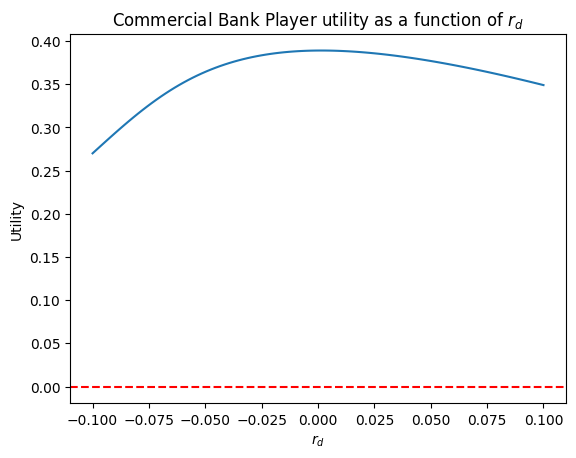

In [57]:
pd.DataFrame([utility_commercial_bank(x,pi=.1,i=-.1,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L=.5,sign=1) for x in rd_grid]).set_index(rd_grid).plot(legend=False)
plt.axhline(0, color = 'r', linestyle='dashed')
plt.title("Commercial Bank Player utility as a function of ${r_d}$")
plt.xlabel("${r_d}$")
plt.ylabel("Utility")
# plt.savefig('utility_commercial_bank.pdf')

In [55]:
# def best_response_household(r_d,pi,i,alpha,beta,gamma,theta):
#     # print("best response household")
#     y_star = optimize.bisect(best_response_function_to_solve_for_zero, 1e-5, 0.99999, args=(r_d,pi,i,alpha,beta,gamma,theta))
    
#     return best_response_household_x_z_given_y(y_star,r_d,pi,i,alpha,beta,gamma,theta)

In [58]:
def derivative_wrt_r_i_household(r_d,pi,r_i,alpha,beta,gamma,theta, h_step=.01):
    a = np.maximum(abs(pi),abs(r_i))
 
    
    # r_d_star_plus = optimize.root_scalar(commercial_bank_function_to_solve_for_zero, x0=-a, x1=a,args=(pi,r_i+h_step,alpha,beta,gamma,theta,r_L)).root
    # r_d_star_minus = optimize.root_scalar(commercial_bank_function_to_solve_for_zero, x0=-a, x1=a,  args=(pi,r_i-h_step,alpha,beta,gamma,theta,r_L)).root

    r_d_star_plus = optimize.bisect(commercial_bank_function_to_solve_for_zero, -pi, r_L, args=(pi,r_i+h_step,alpha,beta,gamma,theta,r_L))
    r_d_star_minus = optimize.bisect(commercial_bank_function_to_solve_for_zero, -pi, r_L, args=(pi,r_i-h_step,alpha,beta,gamma,theta,r_L))

    f_plus = pd.Series(best_response_household(r_d_star_plus,pi,r_i+h_step,alpha,beta,gamma,theta))
    f_minus = pd.Series(best_response_household(r_d_star_minus,pi,r_i-h_step,alpha,beta,gamma,theta))
    
    # print(f_plus)
    # print(f_minus)
    return (f_plus - f_minus)/(2*h_step)
    

In [59]:
# def commercial_bank_function_to_solve_for_zero(r_d,pi,i,alpha,beta,gamma,theta,r_L):
    
#     # y_star = optimize.root_scalar(best_response_function_to_solve_for_zero,bracket=(0.001,0.999), args=(r_d,pi,i,alpha,beta,gamma,theta), method='brentq').root
#     y_star = optimize.root_scalar(best_response_function_to_solve_for_zero,x0=0.5, x1=0.8, args=(r_d,pi,i,alpha,beta,gamma,theta)).root

#     partial_y = derivative_wrt_rd_household(r_d,pi,i,alpha,beta,gamma,theta).loc['y']
    
#     # print(y_star)
#     # print(partial_y)
#     output = partial_y*(r_L-r_d) - y_star
#     # print(r_d,output)
#     return output

In [60]:
def utility_central_bank(i,pi,alpha,beta,gamma,theta,r_L_CB, sign=-1):
    
    # NC: sign, -1 to minimize the -Utility
    try:
        r_d_star = optimal_response_commercial_bank(pi=pi,i=i,alpha=alpha,beta=beta,gamma=gamma,theta=theta,r_L=1)
        # r_d_star = best_response_commercial_bank(pi=pi,i=i,alpha=alpha,beta=beta,gamma=gamma,theta=theta,r_L=1)
        # print(f'r_d_star is {r_d_star}')
        z_star = best_response_household(r_d_star,pi,i,alpha,beta,gamma,theta)['z'].squeeze()

        # print(f'z_star is {z_star}')
        
        result =  sign*(r_L_CB-i)*z_star
        return result
    except Exception as e:
        print(f'{e} with i {i} and pi {pi}')
        
        return 1e6
    

In [61]:
def best_response_central_bank(pi,alpha,beta,gamma,theta,r_L_CB):
    return minimize(utility_central_bank, 0, args=(pi,alpha,beta,gamma,theta,r_L_CB), method='Nelder-Mead').x.item()

In [62]:
pi_grid = np.linspace(-.2,.2,30)
all_results = []
for pi in pi_grid:
    try:
        all_results.append({'pi': pi, 'i': best_response_central_bank(pi,45/100,45/100,10/100,.95,1)})
    except:
        pass

Text(0, 0.5, '$r_{CBDC}$')

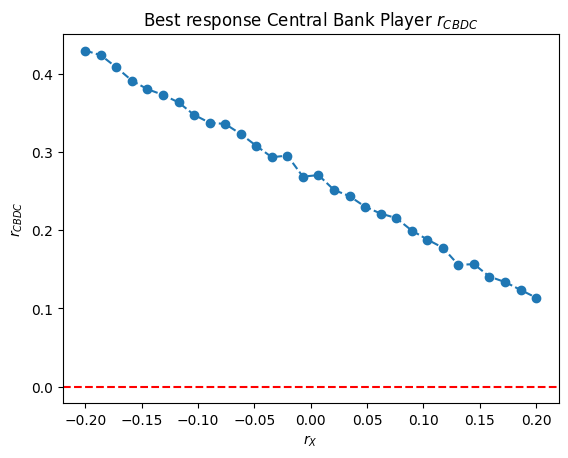

In [63]:
    
pd.DataFrame(all_results).set_index('pi').plot(legend=False,marker="o", linestyle='--')
plt.axhline(0, color = 'r', linestyle='dashed')
plt.title("Best response Central Bank Player $r_{CBDC}$")

all_pis = np.array([x['pi'] for x in all_results if x['pi']>0])
# plt.plot(all_pis, all_pis, color = 'red', alpha=0.5)
# plt.plot(-all_pis, all_pis, color = 'red', alpha=0.5)

plt.xlabel("${r_X}$")
plt.ylabel("$r_{CBDC}$")

# plt.savefig('central_bank_best_response_vs_r_x.pdf')

In [50]:
# i_grid = np.linspace(0,.2,500)
# all_results = []
# for i in i_grid:
#     try:
#         all_results.append({'r_i': i, 'U(r_i)': utility_central_bank(pi=.1,i=i,alpha=45/100,beta=45/100,gamma=10/100,theta=.95,r_L_CB=1)})
#     except:
#         pass
    
# pd.DataFrame(all_results).set_index('r_i').plot(legend=False)
# plt.axhline(0, color = 'r', linestyle='dashed')
# # plt.title("Commercial Bank Player utility as a function of ${r_d}$")
# plt.xlabel("${r_i}$")
# plt.ylabel("Utility")
# plt.xlim(0,.15)
# plt.ylim(0,500)
# # plt.savefig('utility_commercial_bank.pdf')

In [64]:
pi_grid = np.linspace(-.2,.2,30)
all_results_response_commercial_bank = []
alpha=45/100
beta=45/100
gamma=10/100
theta=.95
r_L=1
all_results_central_bank = pd.DataFrame(all_results).set_index('pi')
for pi in pi_grid:
    # print(f"pi is {pi}")
    
    i = all_results_central_bank.loc[pi].squeeze()
    # if i==0: i=1e-2
    # print(f"i is {i}")
    try:
        all_results_response_commercial_bank.append({'pi': pi, 'rd': optimal_response_commercial_bank(pi=pi,i=i,alpha=alpha,beta=beta,gamma=gamma,theta=theta,r_L=r_L)})
    except:
        print(f"error with {pi}")
        pass

Text(0, 0.5, '$r_{d}$')

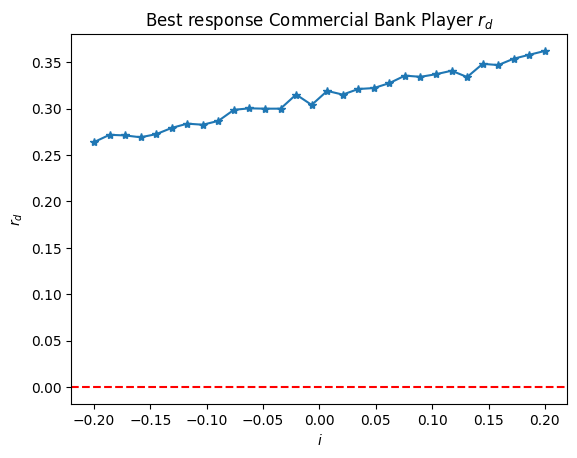

In [65]:
    
df_plot = pd.DataFrame(all_results_response_commercial_bank).set_index('pi',drop=False)

(df_plot.rd+df_plot.pi).plot(legend=False, marker="*")

plt.axhline(0, color = 'r', linestyle='dashed')
plt.title("Best response Commercial Bank Player $r_{d}$")
plt.xlabel("${i}$")
plt.ylabel("$r_{d}$")
# plt.savefig('commercial_bank_best_response_i.pdf')

Text(0, 0.5, '$r_{d}$')

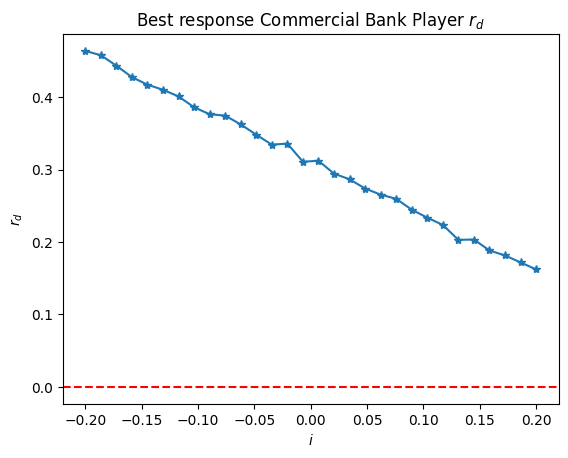

In [66]:
    
pd.DataFrame(all_results_response_commercial_bank).set_index('pi').plot(legend=False, marker="*")

plt.axhline(0, color = 'r', linestyle='dashed')
plt.title("Best response Commercial Bank Player $r_{d}$")
plt.xlabel("${i}$")
plt.ylabel("$r_{d}$")
# plt.savefig('commercial_bank_best_response_i.pdf')

Text(0, 0.5, 'Real interest rate')

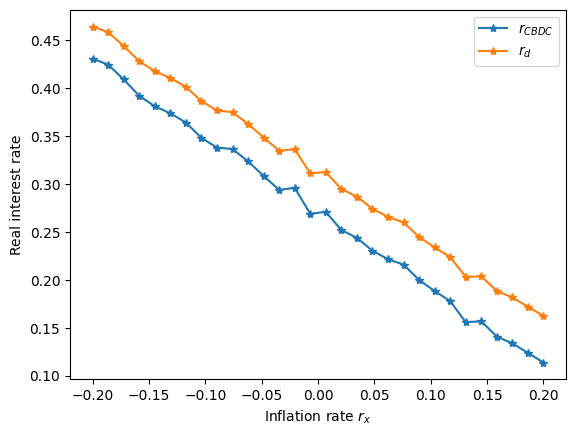

In [67]:
all_results_central_bank.merge(pd.DataFrame(all_results_response_commercial_bank).set_index('pi'), how='left',left_index=True,right_index=True).rename({"i": "$r_{CBDC}$", "rd":"$r_d$"}, axis=1).plot(marker="*")
plt.xlabel("Inflation rate $r_x$")
plt.ylabel("Real interest rate")
# plt.savefig('figures/commercial_bank_and_central_bank_best_response_as_f_inflation.pdf')

Text(0, 0.5, 'Nominal interest rate')

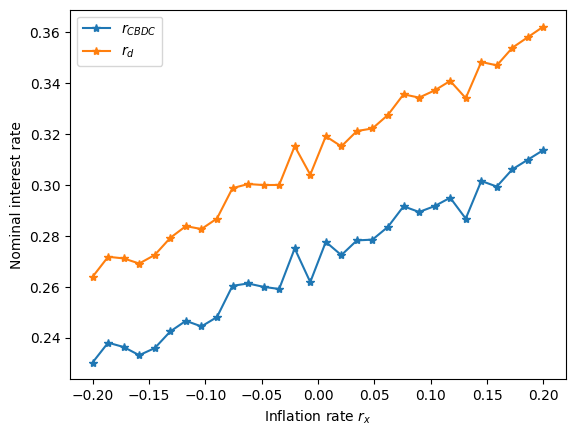

In [68]:
df_to_plot = all_results_central_bank.merge(pd.DataFrame(all_results_response_commercial_bank).set_index('pi',drop=False), how='left',left_index=True,right_index=True).rename({"i": "$r_{CBDC}$", "rd":"$r_d$"}, axis=1)
df_to_plot[['$r_{CBDC}$','$r_d$']].apply(lambda x: x+df_to_plot.pi, axis=0).plot(marker="*")
# plt.plot(df_to_plot.pi[df_to_plot.pi>0],df_to_plot.pi[df_to_plot.pi>0],color='red')
plt.xlabel("Inflation rate $r_x$")
plt.ylabel("Nominal interest rate")
# plt.savefig('figures/commercial_bank_and_central_bank_best_response_as_f_inflation_nominal_rates.pdf')


Text(0, 0.5, 'Difference of nominal interest rate $r_d-r_{CBDC}$')

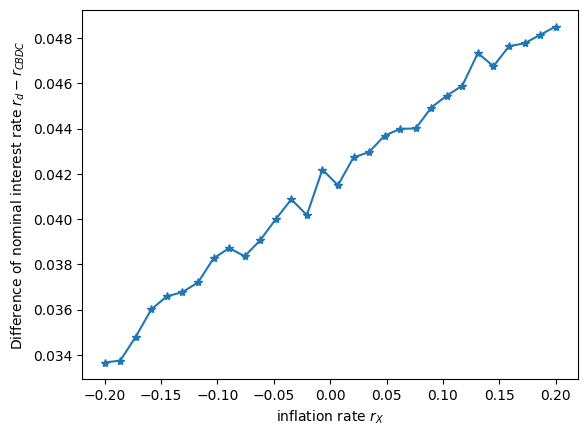

In [69]:
df_to_plot = all_results_central_bank.merge(pd.DataFrame(all_results_response_commercial_bank).set_index('pi',drop=False), how='left',left_index=True,right_index=True).rename({"i": "r_CBDC", "rd":"r_d"}, axis=1)


data_to_plot = df_to_plot[['r_d','r_CBDC']].apply(lambda x: x+df_to_plot.pi, axis=0)

(data_to_plot.r_d-data_to_plot.r_CBDC).plot(marker="*")
# plt.plot(df_to_plot.pi[df_to_plot.pi>0],df_to_plot.pi[df_to_plot.pi>0],color='red')
plt.xlabel("inflation rate $r_X$")
plt.ylabel("Difference of nominal interest rate $r_d-r_{CBDC}$")
# plt.savefig('commercial_bank_and_central_bank_best_response_as_f_inflation.pdf')

In [70]:
from scipy.interpolate import CubicSpline

In [71]:
df_to_plot.head()

,r_CBDC,pi,r_d
pi,,,
-0.200000,0.43025,-0.200000,0.463916
-0.186207,0.42425,-0.186207,0.458001
-0.172414,0.40875,-0.172414,0.443561
-0.158621,0.39175,-0.158621,0.427766
-0.144828,0.38075,-0.144828,0.417341


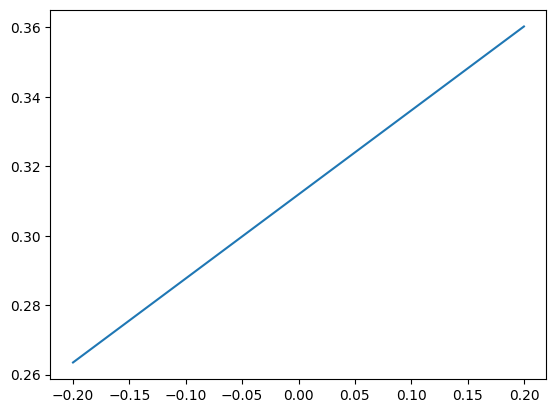

In [72]:
from scipy.interpolate import make_smoothing_spline


commercial_spline_rd = make_smoothing_spline(df_to_plot['pi'].values, df_to_plot['r_d'].values)
x_range = np.arange(df_to_plot['pi'].values.min(), df_to_plot['pi'].values.max(), 1e-4)
plt.plot(x_range, commercial_spline_rd(x_range)+x_range, label='Cubic Spline')

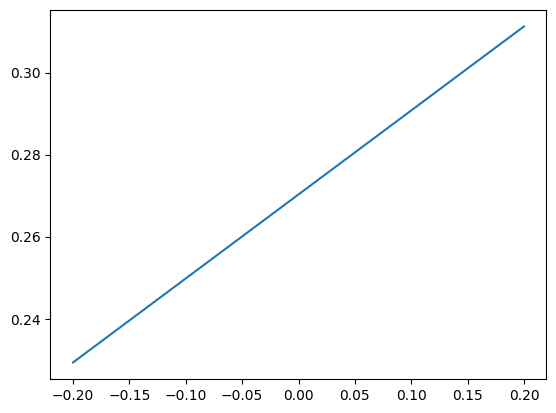

In [73]:
central_spline_rCBDC = make_smoothing_spline(df_to_plot['pi'].values, df_to_plot['r_CBDC'].values)
x_range = np.arange(df_to_plot['pi'].values.min(), df_to_plot['pi'].values.max(), 1e-4)
plt.plot(x_range, central_spline_rCBDC(x_range)+x_range, label='Cubic Spline')

Text(0, 0.5, 'Nominal interest rate')

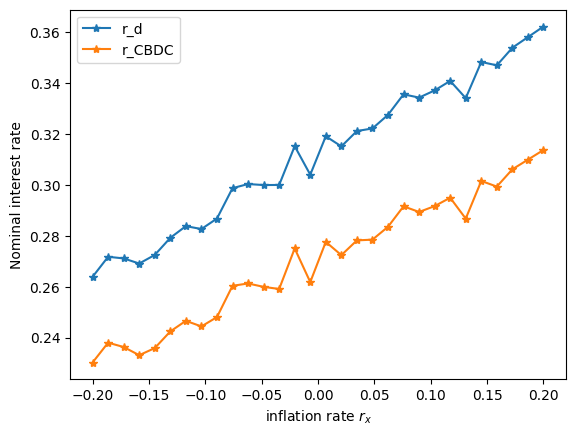

In [74]:
df_to_plot = all_results_central_bank.merge(pd.DataFrame(all_results_response_commercial_bank).set_index('pi',drop=False), how='left',left_index=True,right_index=True).rename({"i": "r_CBDC", "rd":"r_d"}, axis=1)

df_to_plot[['r_d','r_CBDC']].apply(lambda x: x+df_to_plot.pi, axis=0).plot(marker="*")
# plt.plot(df_to_plot.pi[df_to_plot.pi>0],df_to_plot.pi[df_to_plot.pi>0],color='red')
plt.xlabel("inflation rate $r_x$")
plt.ylabel("Nominal interest rate")
# plt.savefig('commercial_bank_and_central_bank_best_response_as_f_inflation_nominal_rates.pdf')

Text(0, 0.5, 'Nominal interest rate')

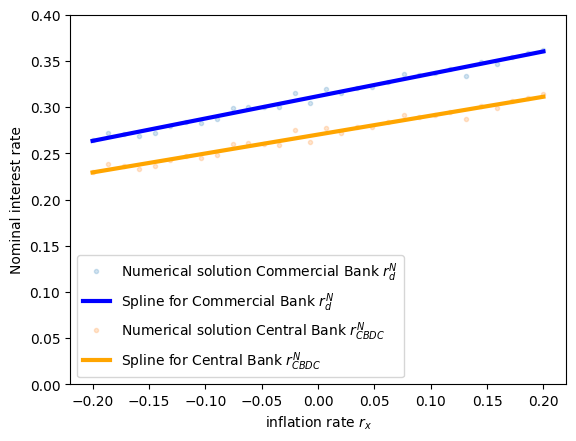

In [75]:
df_to_plot = all_results_central_bank.merge(pd.DataFrame(all_results_response_commercial_bank).set_index('pi',drop=False), how='left',left_index=True,right_index=True).rename({"i": "r_CBDC", "rd":"r_d"}, axis=1)


data_to_plot = df_to_plot[['r_d','r_CBDC']].apply(lambda x: x+df_to_plot.pi, axis=0)

(data_to_plot.r_d).plot(marker=".",label='Numerical solution Commercial Bank $r_d^N$', alpha=.2, linewidth=0)
plt.plot(x_range, commercial_spline_rd(x_range)+x_range, label='Spline for Commercial Bank $r_d^N$',color='blue', linewidth=3)

(data_to_plot.r_CBDC).plot(marker=".",label='Numerical solution Central Bank $r_{CBDC}^N$ ', alpha=.2,linewidth=0)

plt.plot(x_range, central_spline_rCBDC(x_range)+x_range, label='Spline for Central Bank $r_{CBDC}^N$', color='orange', linewidth=3)

plt.ylim(0,0.4)

plt.legend()

# plt.plot(df_to_plot.pi[df_to_plot.pi>0],df_to_plot.pi[df_to_plot.pi>0],color='red')
plt.xlabel("inflation rate $r_x$")
plt.ylabel("Nominal interest rate")
# plt.savefig('commercial_bank_and_central_bank_best_response_as_f_inflation_spline_and_scatter_NOMINAL.pdf')

Text(0, 0.5, 'Difference in interest rate')

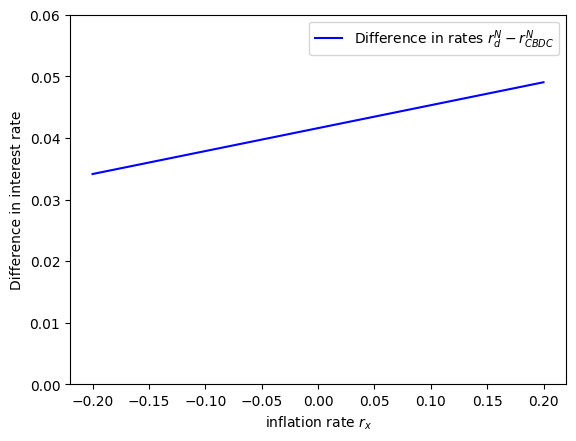

In [76]:
df_to_plot = all_results_central_bank.merge(pd.DataFrame(all_results_response_commercial_bank).set_index('pi',drop=False), how='left',left_index=True,right_index=True).rename({"i": "r_CBDC", "rd":"r_d"}, axis=1)


data_to_plot = df_to_plot[['r_d','r_CBDC']].apply(lambda x: x+df_to_plot.pi, axis=0)

# (data_to_plot.r_d).plot(marker=".",label='Numerical solution Commercial Bank $r_d^N$', alpha=.2, linewidth=0)
plt.plot(x_range, commercial_spline_rd(x_range) - central_spline_rCBDC(x_range), label='Difference in rates $r_d^N -r_{CBDC}^N $',color='blue')

plt.ylim(0,0.06)
plt.legend()

# plt.plot(df_to_plot.pi[df_to_plot.pi>0],df_to_plot.pi[df_to_plot.pi>0],color='red')
plt.xlabel("inflation rate $r_x$")
plt.ylabel("Difference in interest rate")
# plt.savefig('commercial_bank_and_central_bank_best_response_as_f_inflation_spline_and_scatter_NOMINAL_difference.pdf')

In [291]:
# def function_to_solve_for_zero_central_bank(i,pi,alpha,beta,gamma,theta,r_L_central_bank):
#     # a = np.maximum(abs(pi),abs(i))

#     # r_d_star = optimize.root_scalar(commercial_bank_function_to_solve_for_zero, x0=-1, x1=1, args=(pi,i,alpha,beta,gamma,theta,r_L)).root
    
#     r_d_star = optimal_response_commercial_bank(pi=pi,i=i,alpha=alpha,beta=beta,gamma=gamma,theta=theta,r_L=1)
#     print(f'r_d_star is {r_d_star}')
#     partial_z = derivative_wrt_r_i_household(r_d_star,pi,i,alpha,beta,gamma,theta, h_step=.0001)['z']
    
#     print(f'partial_z is {partial_z}')
#     z_star = best_response_household(r_d_star,pi,i,alpha,beta,gamma,theta)['z']
        
#     output = partial_z*(r_L_central_bank-i) - z_star

#     return output

In [292]:
# Central bank also minimizes (r_L_CB-r_CBDC )z

In [293]:
# def function_to_solve_for_zero_central_bank(i,pi,alpha,beta,gamma,theta,r_L):
#     a = np.maximum(abs(pi),abs(i))

#     r_d_star = optimize.root_scalar(commercial_bank_function_to_solve_for_zero, x0=-a, x1=a, args=(pi,i,alpha,beta,gamma,theta,r_L)).root
    
#     z_prime = derivative_wrt_r_i_household(r_d_star,pi,i,alpha,beta,gamma,theta, h_step=.0001)['z']
        
#     z_star = best_response_household(r_d_star,pi,i,alpha,beta,gamma,theta)['z']
        
#     return z_prime*i-z_star*(r_L-i)

In [294]:
# i_grid = np.linspace(-.2,.2,100)
# all_results = []

In [295]:
# i_grid = np.linspace(-.2,.2,100)
# all_results = []
# for pi in i_grid:
#     try:
#         all_results.append({'pi': pi, 'i': function_to_solve_for_zero_central_bank(pi,.1,45/100,45/100,10/100,.9,1)})
#     except:
#         pass

In [296]:
# pd.DataFrame(all_results).set_index('pi').plot()

In [297]:
# pd.DataFrame([function_to_solve_for_zero_central_bank(x,.1,45/100,45/100,10/100,.95,1) for x in i_grid]).set_index(i_grid).plot()

In [298]:
# function_to_solve_for_zero_central_bank(.1,.1,45/100,45/100,10/100,.95,1)

In [299]:
# def best_response_central_bank(pi,alpha,beta,gamma,theta,r_L):
#     i_star = optimize.root_scalar(function_to_solve_for_zero_central_bank, x0=-.1,x1=.1, args=(pi,alpha,beta,gamma,theta,r_L)).root
    
#     return i_star


In [300]:
# best_response_central_bank(.1,45/100,45/100,10/100,.95,1)


In [301]:
# pi_grid =  np.linspace(-.1,.1,5)

In [302]:
# pd.DataFrame([best_response_central_bank(x,30/100,30/100,30/100,.95,1) for x in pi_grid]).set_index(pi_grid).plot()

# Inflation mean reverting path

In [77]:
def generate_inflation_series(
        r0: float, kappa: float, simulation_timesteps: int, theta: float, mu: float
    ) -> np.array:
        
        r = np.zeros(simulation_timesteps)
        r[0] = r0

        for t in range(1, simulation_timesteps):
             r[t] = np.random.normal(
                    loc=mu + (r[t - 1] - mu) * (np.exp(-kappa)),
                    scale=((theta) / (2 * kappa)) * (1 - np.exp(-2 * kappa))
                )


        
        return r


Text(0, 0.5, 'Inflation rate')

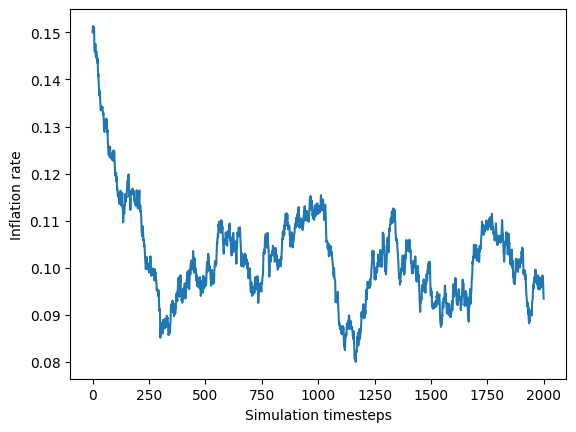

In [78]:
np.random.seed(2024)
simulated_inflation_series = generate_inflation_series(.15, 0.01, 2000, .001, 0.10)
plt.plot(simulated_inflation_series)
plt.xlabel('Simulation timesteps')
plt.ylabel('Inflation rate')
# plt.savefig('inflation_path_example_model_chapter.pdf')

## Central Bank responses over time

In [79]:
best_response_central_bank(.08,45/100,45/100,10/100,.95,1)


0.20375000000000015

In [80]:
time_series_response_central_bank = np.zeros(len(simulated_inflation_series))
alpha=45/100
beta=45/100
gamma=10/100
theta=.95
r_L=1
for t in range(len(simulated_inflation_series)):
    # print(f"pi is {simulated_inflation_series[t]}")
    
    
    try:
        # time_series_response_central_bank[t] = best_response_central_bank(simulated_inflation_series[t],45/100,45/100,10/100,.95,1)
        time_series_response_central_bank[t] = central_spline_rCBDC(simulated_inflation_series[t])

    except:
        print(f"error with {pi}")
        pass

Text(0, 0.5, '$r_{CBDC}$')

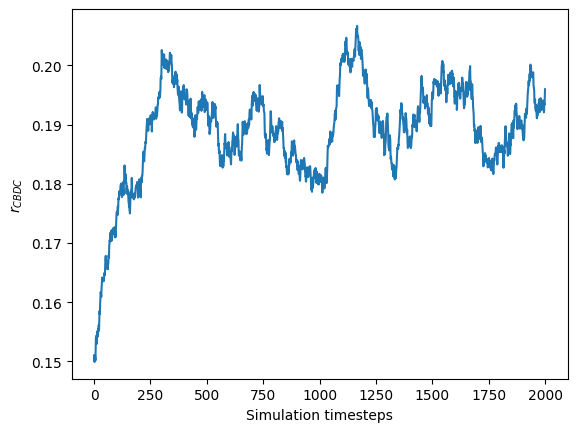

In [81]:
plt.plot(time_series_response_central_bank)
plt.xlabel('Simulation timesteps')
plt.ylabel('$r_{CBDC}$')
# plt.savefig('inflation_path_example_model_chapter_response_Central_Bank.pdf')

## Time series of Commercial Bank responses

In [86]:
time_series_response_central_bank = np.zeros(len(simulated_inflation_series))
time_series_response_commercial_bank = np.zeros(len(simulated_inflation_series))

alpha=45/100
beta=45/100
gamma=10/100
theta=.95
r_L=r_L_CBDC=1
for t in range(len(simulated_inflation_series)):
    # print(f"pi is {simulated_inflation_series[t]}")
    
    
    try:
        # time_series_response_central_bank[t] = best_response_central_bank(simulated_inflation_series[t],alpha,beta,gamma,theta,r_L_CBDC)
        
        # time_series_response_commercial_bank[t] = optimal_response_commercial_bank(pi=simulated_inflation_series[t],i=time_series_response_central_bank[t],alpha=alpha,beta=beta,gamma=gamma,theta=theta,r_L=r_L)
        time_series_response_commercial_bank[t] = commercial_spline_rd(simulated_inflation_series[t])
        time_series_response_central_bank[t] = central_spline_rCBDC(simulated_inflation_series[t])



    except:
        print(f"error with {pi}")
        pass

Text(0, 0.5, '$r_d-r_{CBDC}$')

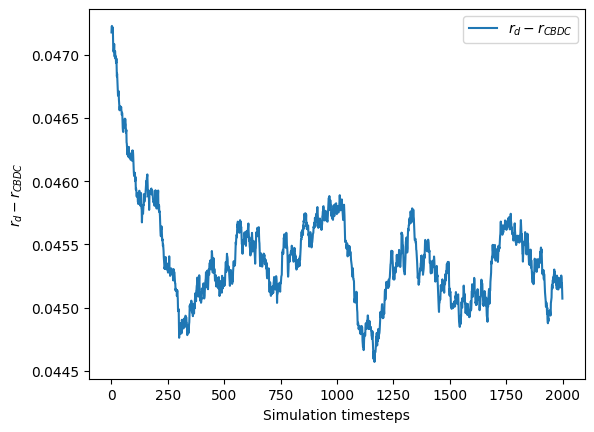

In [87]:
plt.plot(time_series_response_commercial_bank-time_series_response_central_bank, label='$r_d-r_{CBDC}$')
plt.legend()
plt.xlabel('Simulation timesteps')
plt.ylabel('$r_d-r_{CBDC}$')
# plt.savefig('inflation_path_example_model_chapter_response_Commercial_Bank_and_Central_Bank_difference.pdf')

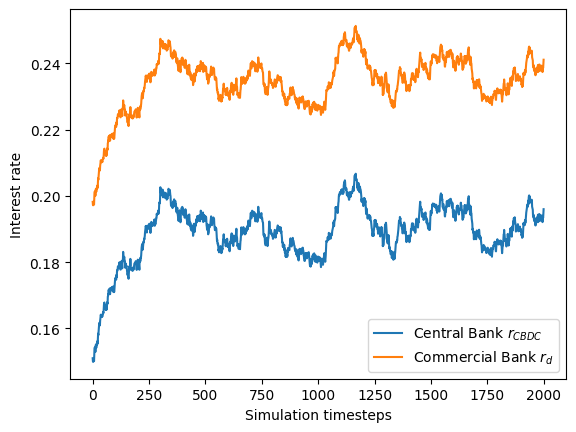

In [88]:
plt.plot(time_series_response_central_bank,label='Central Bank $r_{CBDC}$')
plt.plot(time_series_response_commercial_bank,label='Commercial Bank $r_d$')

plt.xlabel('Simulation timesteps')
plt.ylabel('Interest rate')
plt.legend()
# plt.savefig('inflation_path_example_model_chapter_response_Commercial_Bank_and_Central_Bank.pdf')

In [89]:
# time_series_response_central_bank = np.zeros(len(simulated_inflation_series))
# time_series_response_commercial_bank = np.zeros(len(simulated_inflation_series))
time_series_response_household = []

alpha=45/100
beta=45/100
gamma=10/100
theta=.95
r_L=r_L_CBDC=1
for t in range(len(simulated_inflation_series)):
    # print(f"pi is {simulated_inflation_series[t]}")
    
    
    try:
        # time_series_response_central_bank[t] = best_response_central_bank(simulated_inflation_series[t],alpha,beta,gamma,theta,r_L_CBDC)
        
        # time_series_response_commercial_bank[t] = optimal_response_commercial_bank(pi=simulated_inflation_series[t],i=time_series_response_central_bank[t],alpha=alpha,beta=beta,gamma=gamma,theta=theta,r_L=r_L)
        best_response_t = best_response_household(r_d=time_series_response_commercial_bank[t],
                                                                      pi=simulated_inflation_series[t],
                                                                      i=time_series_response_central_bank[t],
                                                                      alpha=alpha,
                                                                      beta=beta,
                                                                      gamma=gamma,
                                                                      theta=theta)
        # best_response_t['t'] = t
        time_series_response_household.append(best_response_t)

    except:
        print(f"error with {pi}")
        pass

Text(0, 0.5, 'Allocation fraction')

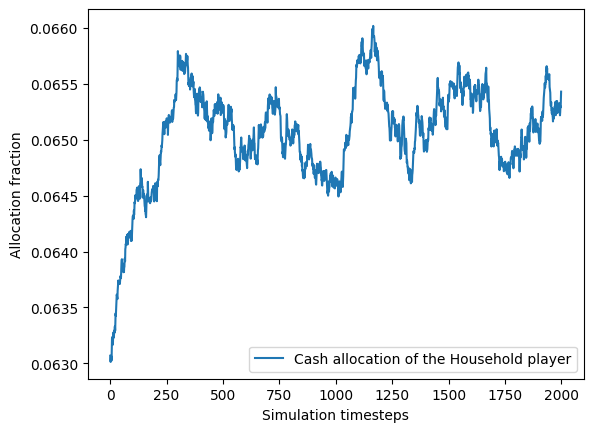

In [90]:
pd.DataFrame(time_series_response_household).loc[:,'x'].plot(label='Cash allocation of the Household player')
plt.legend()
plt.xlabel('Simulation timesteps')
plt.ylabel('Allocation fraction')
# plt.savefig('example_time_series_allocation_cash_household.pdf')

Text(0, 0.5, 'Allocation fraction')

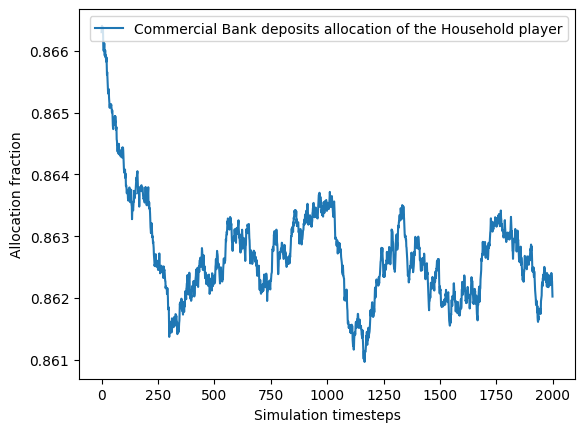

In [91]:
pd.DataFrame(time_series_response_household).loc[:,'y'].plot(label='Commercial Bank deposits allocation of the Household player')
plt.legend()
plt.xlabel('Simulation timesteps')
plt.ylabel('Allocation fraction')
# plt.savefig('example_time_series_allocation_deposits_household.pdf')

Text(0, 0.5, 'Allocation fraction')

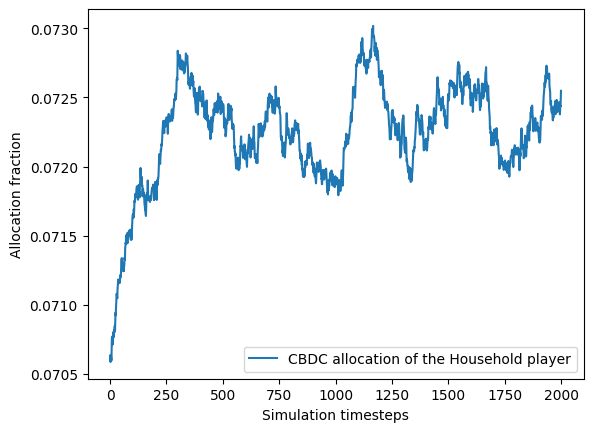

In [92]:
pd.DataFrame(time_series_response_household).loc[:,'z'].plot(label='CBDC allocation of the Household player')
plt.legend()
plt.xlabel('Simulation timesteps')
plt.ylabel('Allocation fraction')
# plt.savefig('example_time_series_allocation_CBDC_household.pdf')

In [93]:
best_response_household(r_d=.1,pi=.1,i=.1,alpha=alpha,beta=beta,gamma=gamma,theta=theta)

{'x': np.float64(0.10198390006583936),
 'y': np.float64(0.7347404454006768),
 'z': np.float64(0.16327565453348375)}

# Base without CBDC demand

In [205]:
pi=.05
# r_d = 0.015 - pi # NC: this is the real interest rate
r_d_observed = -pi
S_cash = .4
S_deposit = .6

In [206]:
best_response_commercial_bank(pi=pi,i=99,alpha=alpha,beta=1-alpha,gamma=0,theta=theta,r_L=r_L)

0.07363398551940924

In [207]:
optimal_response_commercial_bank(pi=pi,i=99,alpha=alpha,beta=1-alpha,gamma=0,theta=theta,r_L=r_L)

0.07362365722656251

# NC: Using best response for commercial bank, so Central and Commercial Bank both use the minimize function

In [307]:
r_L=1

In [308]:
best_response_commercial_bank(pi=pi,i=99,alpha=.4,beta=1-.4,gamma=0,theta=.7,r_L=1)

-0.12485562086105464

In [309]:
best_response_commercial_bank(pi=pi,i=99,alpha=.4,beta=1-.4,gamma=0,theta=.7,r_L=r_L)

-0.12485562086105464

In [310]:
def vector_objective_household(x,pi,r_d_observed,S_cash,S_deposit):
    
    
    alpha = x[0]
    theta = x[1]
    print(f"alpha {alpha}")
    print(f"theta {theta}")
    print(f"pi {pi}")
    print(f"r_d_observed {r_d_observed}")
    print(f"S_cash {S_cash}")
    print(f"S_deposit {S_deposit}")

    r_d = best_response_commercial_bank(pi=pi,i=99,alpha=alpha,beta=1-alpha,gamma=0,theta=theta,r_L=r_L)
    print(f"r_d is {r_d}")
    household_response = best_response_household(r_d=r_d,pi=pi,i=.99,alpha=alpha,beta=1-alpha,gamma=0,theta=theta)
    
    print(f"household_response {household_response}")
    errors = np.array([household_response['x']-S_cash, household_response['y']-S_deposit,r_d-r_d_observed])
    return np.dot(errors,errors)
    

In [311]:
args = (pi,r_d_observed,.5,.5)

In [312]:
vector_objective_household([.3,0.99],*args)

alpha 0.3
theta 0.99
pi 0.15
r_d_observed -0.2
S_cash 0.5
S_deposit 0.5
r_d is -0.09842069864273179
household_response {'x': 0.0513326989826789, 'y': 0.9486673010173211, 'z': -0.0}


0.4129230484685656

In [313]:
optim  = minimize(vector_objective_household, [.3,.99], args=(pi,r_d_observed,S_cash,S_deposit), method='Nelder-Mead')

alpha 0.3
theta 0.99
pi 0.15
r_d_observed -0.2
S_cash 0.4
S_deposit 0.6
r_d is -0.09842069864273179
household_response {'x': 0.0513326989826789, 'y': 0.9486673010173211, 'z': -0.0}
alpha 0.315
theta 0.99
pi 0.15
r_d_observed -0.2
S_cash 0.4
S_deposit 0.6
r_d is -0.0968129324913036
household_response {'x': 0.0526003666047726, 'y': 0.9473996333952274, 'z': -0.0}
alpha 0.3
theta 1.0395
pi 0.15
r_d_observed -0.2
S_cash 0.4
S_deposit 0.6
r_d is -0.09680134534835927
household_response {'x': -0.34159498587612724, 'y': 1.3415949858761271, 'z': 0.0}
alpha 0.315
theta 0.9404999999999999
pi 0.15
r_d_observed -0.2
S_cash 0.4
S_deposit 0.6
r_d is -0.04852035999298192
household_response {'x': 0.13163925778997995, 'y': 0.86836074221002, 'z': -0.0}
alpha 0.3225
theta 0.8909999999999996
pi 0.15
r_d_observed -0.2
S_cash 0.4
S_deposit 0.6
r_d is -0.038718595504761685
household_response {'x': 0.18522105042812836, 'y': 0.8147789495718717, 'z': -0.0}
alpha 0.33749999999999997
theta 0.8909999999999996
pi 0.1

In [314]:
optim

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 5.928946023083036e-10
             x: [ 3.755e-01  6.712e-01]
           nit: 29
          nfev: 57
 final_simplex: (array([[ 3.755e-01,  6.712e-01],
                       [ 3.755e-01,  6.711e-01],
                       [ 3.755e-01,  6.711e-01]]), array([ 5.929e-10,  4.376e-09,  1.269e-08]))

In [315]:
alpha_optim, theta_optim = optim.x

In [316]:
alpha_optim

0.37551145297633404

In [317]:
theta_optim

0.6711508119220441

In [318]:
theta_optim.round(4)

0.6712

In [319]:
r_d_observed

-0.2

In [334]:
theta_range = np.linspace(0.5,0.999,20)

In [328]:
theta_range = np.linspace(0.3,0.9,10)

In [335]:
theta_range

array([0.5       , 0.52626316, 0.55252632, 0.57878947, 0.60505263,
       0.63131579, 0.65757895, 0.68384211, 0.71010526, 0.73636842,
       0.76263158, 0.78889474, 0.81515789, 0.84142105, 0.86768421,
       0.89394737, 0.92021053, 0.94647368, 0.97273684, 0.999     ])

In [336]:
alpha_optim

0.37551145297633404

In [337]:
all_rd_responses_f_theta = np.zeros(len(theta_range))
for i in range(len(theta_range)):
    all_rd_responses_f_theta[i] = best_response_commercial_bank(pi=pi,i=99,alpha=alpha_optim,beta=1-alpha_optim,gamma=0,theta=theta_range[i],r_L=r_L)
    
    

In [338]:
pi

0.15

(0.5, 0.9)

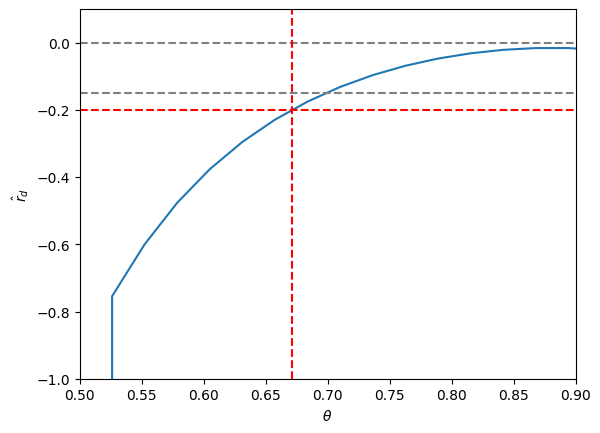

In [339]:
pd.DataFrame(all_rd_responses_f_theta, index=theta_range).plot(legend=None)
plt.axhline(0, color='grey', linestyle='dashed')
plt.axhline(-pi, color='grey', linestyle='dashed')

plt.axhline(r_d_observed, color='red', linestyle='dashed')
plt.axvline(theta_optim, color='red', linestyle='dashed')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\hat{r}_d$')
plt.ylim(-1,.1)
plt.xlim(0.5,.9)

# plt.savefig('Commercial_Bank_best_response_f_theta_first_example.pdf')

Text(0, 0.5, '$\\hat{r}_d$')

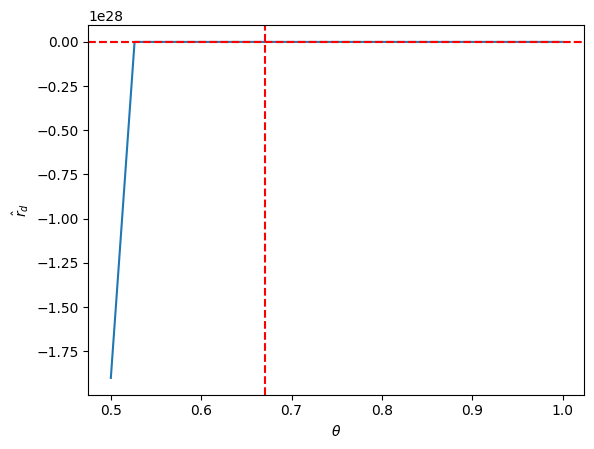

In [340]:
pd.DataFrame(all_rd_responses_f_theta, index=theta_range).plot(legend=None)
plt.axhline(0, color='grey', linestyle='dashed')
plt.axhline(-0.05, color='red', linestyle='dashed')
plt.axvline(theta_optim, color='red', linestyle='dashed')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\hat{r}_d$')
# plt.savefig('Commercial_Bank_best_response_f_theta.pdf')

In [341]:
pi=.15
# r_d = 0.015 - pi # NC: this is the real interest rate
r_d_observed = -.2
S_cash = .4
S_deposit = .6
optim  = minimize(vector_objective_household, [.3,.99], args=(pi,r_d_observed,S_cash,S_deposit), method='Nelder-Mead')
alpha_optim, theta_optim = optim.x

all_rd_responses_f_theta = np.zeros(len(theta_range))
for i in range(len(theta_range)):
    all_rd_responses_f_theta[i] = best_response_commercial_bank(pi=pi,i=99,alpha=alpha_optim,beta=1-alpha_optim,gamma=0,theta=theta_range[i],r_L=r_L)
    
    

alpha 0.3
theta 0.99
pi 0.15
r_d_observed -0.2
S_cash 0.4
S_deposit 0.6
r_d is -0.09842069864273179
household_response {'x': 0.0513326989826789, 'y': 0.9486673010173211, 'z': -0.0}
alpha 0.315
theta 0.99
pi 0.15
r_d_observed -0.2
S_cash 0.4
S_deposit 0.6
r_d is -0.0968129324913036
household_response {'x': 0.0526003666047726, 'y': 0.9473996333952274, 'z': -0.0}
alpha 0.3
theta 1.0395
pi 0.15
r_d_observed -0.2
S_cash 0.4
S_deposit 0.6
r_d is -0.09680134534835927
household_response {'x': -0.34159498587612724, 'y': 1.3415949858761271, 'z': 0.0}
alpha 0.315
theta 0.9404999999999999
pi 0.15
r_d_observed -0.2
S_cash 0.4
S_deposit 0.6
r_d is -0.04852035999298192
household_response {'x': 0.13163925778997995, 'y': 0.86836074221002, 'z': -0.0}
alpha 0.3225
theta 0.8909999999999996
pi 0.15
r_d_observed -0.2
S_cash 0.4
S_deposit 0.6
r_d is -0.038718595504761685
household_response {'x': 0.18522105042812836, 'y': 0.8147789495718717, 'z': -0.0}
alpha 0.33749999999999997
theta 0.8909999999999996
pi 0.1

(-0.7, 0.05)

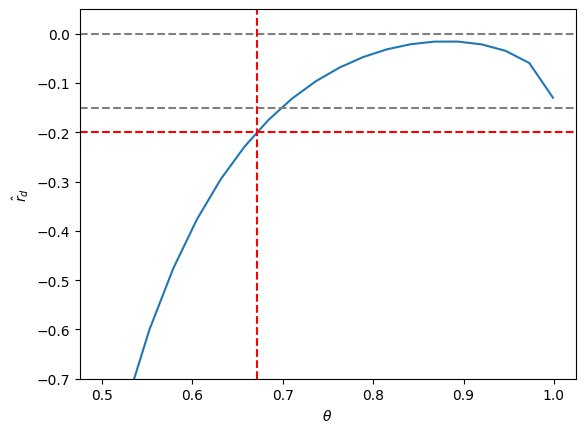

In [343]:
pd.DataFrame(all_rd_responses_f_theta, index=theta_range).plot(legend=None)
plt.axhline(0, color='grey', linestyle='dashed')
plt.axhline(-pi, color='grey', linestyle='dashed')

plt.axhline(r_d_observed, color='red', linestyle='dashed')
plt.axvline(theta_optim, color='red', linestyle='dashed')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\hat{r}_d$')
plt.ylim(-.7,.05)

# plt.savefig('Commercial_Bank_best_response_f_theta_second_example.pdf')

In [186]:
optim_rd = best_response_commercial_bank(pi=pi,i=99,alpha=alpha_optim,beta=1-alpha_optim,gamma=0,theta=theta_optim,r_L=r_L)


In [278]:
optimal_response_commercial_bank(pi=pi,i=99,alpha=alpha_optim,beta=1-alpha_optim,gamma=0,theta=theta_optim,r_L=1)


-0.05

In [115]:
np.round(optim_rd,3)

-0.05

In [104]:
theta_optim

0.7041909876736236

In [328]:
theta_optim

0.7041909876736236

In [334]:
alpha_optim

0.4000004179290226

In [327]:
best_response_household(r_d=optim_rd,pi=pi,i=.5,alpha=alpha_optim,beta=1-alpha_optim,gamma=0,theta=theta_optim)

{'x': 0.4000332034746499, 'y': 0.5999667965253501, 'z': -0.0}

In [338]:
best_response_household(r_d=optim_rd,pi=pi,i=.5,alpha=alpha_optim,beta=1-alpha_optim,gamma=0,theta=.1)

{'x': 0.40000194813373663, 'y': 0.5999980518662634, 'z': 0.0}

In [108]:
rd_grid = np.linspace(0,.5,200)

In [109]:
best_responses_household =[]

for r_d in rd_grid:
    best_responses_household.append(best_response_household(r_d=r_d,pi=.1,i=.5,alpha=alpha,beta=beta,gamma=gamma,theta=theta))
    

                             

<Axes: >

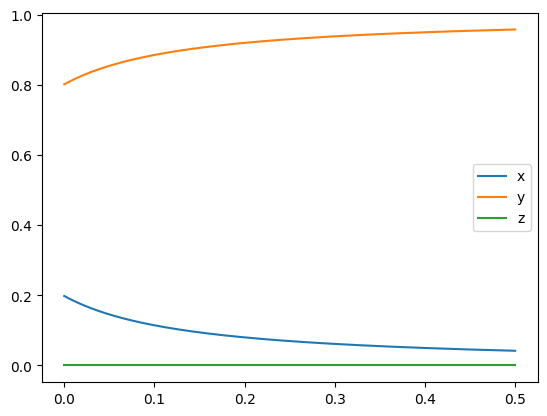

In [110]:
pd.DataFrame(best_responses_household).set_index(rd_grid).plot()